In [1]:
#importing modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

To address our analysis, we need to respond to the subsequent inquiries:
1. Do a greater number of restaurants provide online delivery as opposed to offline services?
2. Which types of restaurants are the most favored by the general public?
3. What price range is preferred by couples for their dinner at restaurants?

In [2]:
#importing data
data = pd.read_csv("zomato_data.csv")
#converting to data frame
df = pd.DataFrame(data)

In [3]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
#converting cloumn value to string to split after '/' and accessing value using index
def handleRate(value):
    value = str(value)
    value.split("/")
    value = value[0]
    return float(value)
df['rate']=df['rate'].apply(handleRate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.0,775,800,Buffet
1,Spice Elephant,Yes,No,4.0,787,800,Buffet
2,San Churro Cafe,Yes,No,3.0,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.0,88,300,Buffet
4,Grand Village,No,No,3.0,166,600,Buffet


In [10]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of Restaurant')

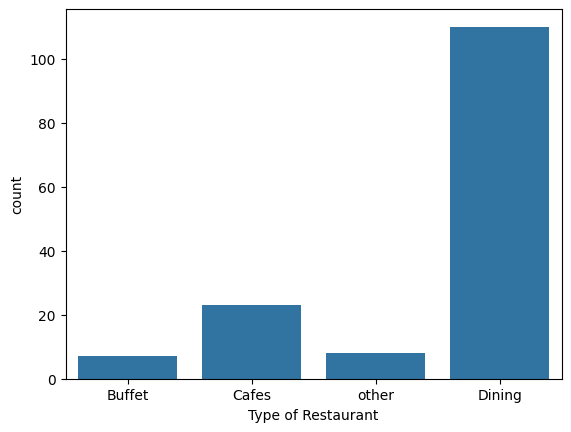

In [6]:
#plotting
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Type of Restaurant")

Text(0, 0.5, 'Votes')

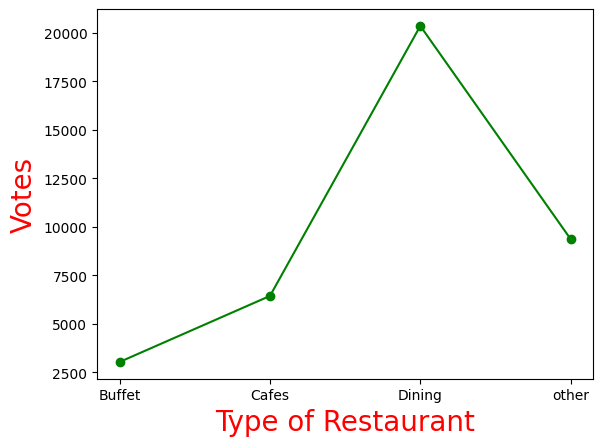

In [18]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result,c="green",marker="o")
plt.xlabel("Type of Restaurant",c="red",size=20)
plt.ylabel("Votes", c="red", size=20)

In [26]:
max_votes = df['votes'].max()
restaurant_with_max_votes = df.loc[df['votes'] == max_votes, 'name']

print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

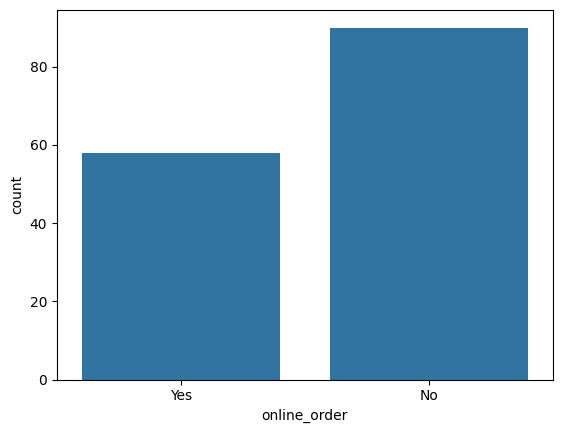

In [27]:
sns.countplot(x=data['online_order'])

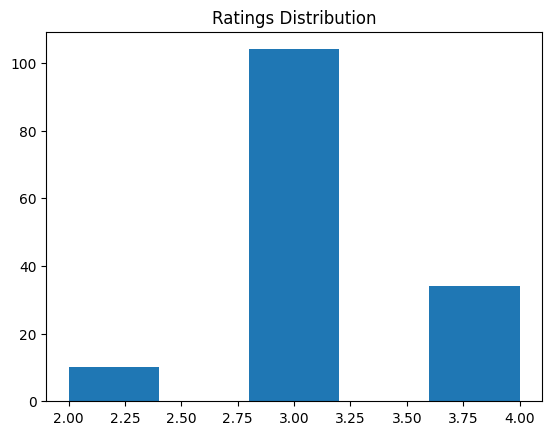

In [29]:
plt.hist(df['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

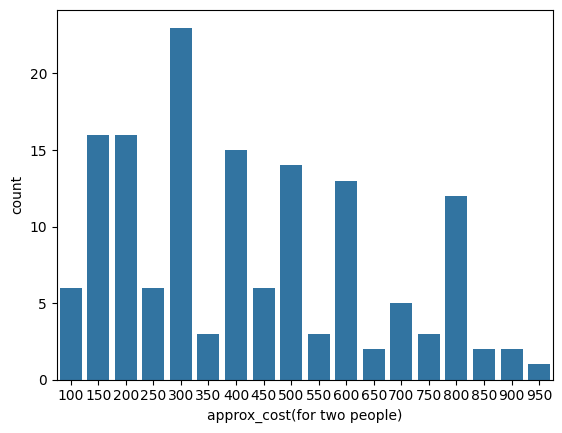

In [31]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

<Axes: xlabel='online_order', ylabel='rate'>

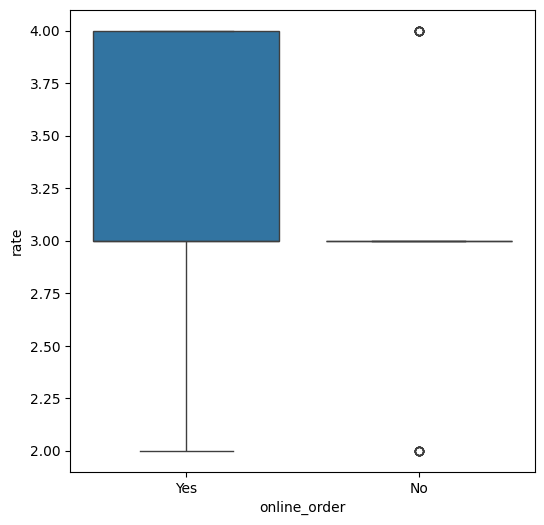

In [33]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = df)

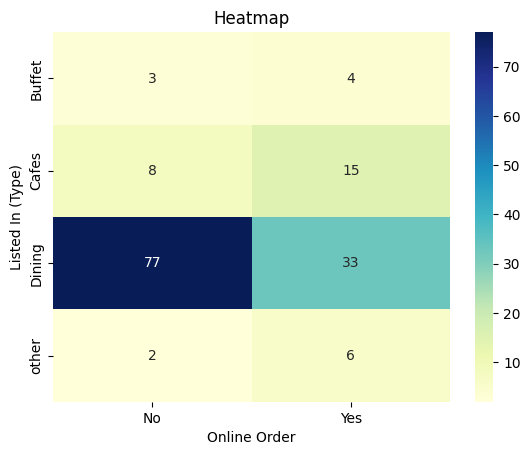

In [39]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc="size", fill_value=10)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

Important points analysed from Zomato Data:

1. There is no NULL value in dataframe.
2. The majority of the restaurants fall into the dining category.
3. Dining restaurants are preferred by a larger number of individuals.
4. This suggests that a majority of the restaurants do not accept online orders.
5. The majority of restaurants received ratings ranging from 3.5 to 4.
6. The majority of couples prefer restaurants with an approximate cost of 300 rupees.
7. Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

Conclusion:
Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.